In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

# preparing the data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
xtrain= pd.read_csv('/content/drive/MyDrive/4-1_Semester/CSE-404/Testing/cod.csv')
print(xtrain.info())
xtrain.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558 entries, 0 to 1557
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1558 non-null   object 
 1   wins            1558 non-null   int64  
 2   kills           1558 non-null   int64  
 3   kdRatio         1558 non-null   float64
 4   killstreak      1558 non-null   int64  
 5   level           1558 non-null   int64  
 6   losses          1558 non-null   int64  
 7   prestige        1558 non-null   int64  
 8   hits            1558 non-null   int64  
 9   timePlayed      1558 non-null   int64  
 10  headshots       1558 non-null   int64  
 11  averageTime     1558 non-null   float64
 12  gamesPlayed     1558 non-null   int64  
 13  assists         1558 non-null   int64  
 14  misses          1558 non-null   int64  
 15  xp              1558 non-null   int64  
 16  scorePerMinute  1558 non-null   float64
 17  shots           1558 non-null   i

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
1264,Shadow9World#3013168,1,65,2.5,8,3,1,20,197,3,34,1.5,2,9,578,8825,226.4,775,26
1053,Losvdx,0,0,0.0,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
487,LaTeR_KiD-_-#5158276,3,4,1.0,0,1,0,0,0,3,2,3.0,0,0,0,2425,0.0,0,4


In [4]:
xtrain = xtrain.drop(columns=['name','kills','deaths'])

xtrain.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558 entries, 0 to 1557
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   wins            1558 non-null   int64  
 1   kdRatio         1558 non-null   float64
 2   killstreak      1558 non-null   int64  
 3   level           1558 non-null   int64  
 4   losses          1558 non-null   int64  
 5   prestige        1558 non-null   int64  
 6   hits            1558 non-null   int64  
 7   timePlayed      1558 non-null   int64  
 8   headshots       1558 non-null   int64  
 9   averageTime     1558 non-null   float64
 10  gamesPlayed     1558 non-null   int64  
 11  assists         1558 non-null   int64  
 12  misses          1558 non-null   int64  
 13  xp              1558 non-null   int64  
 14  scorePerMinute  1558 non-null   float64
 15  shots           1558 non-null   int64  
dtypes: float64(3), int64(13)
memory usage: 194.9 KB


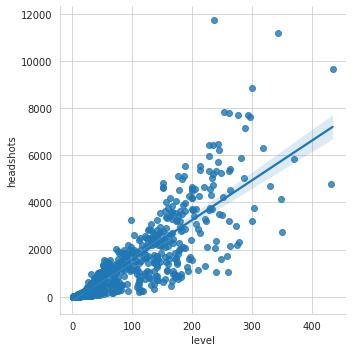

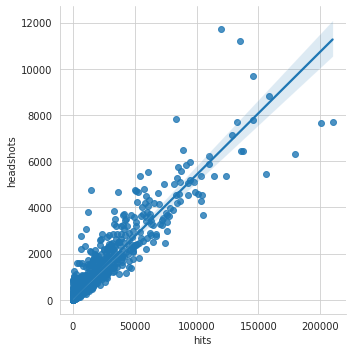

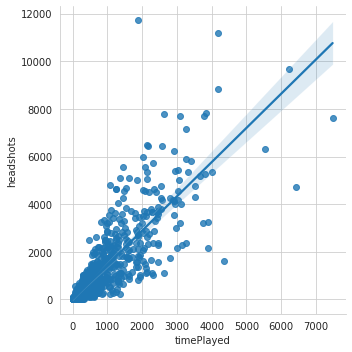

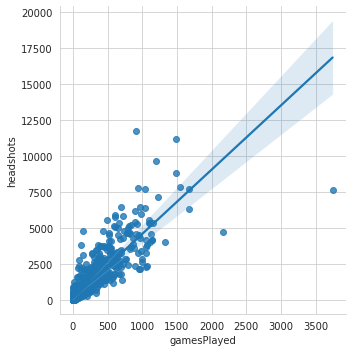

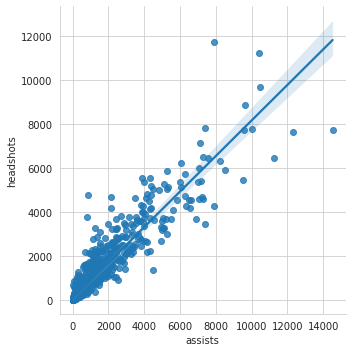

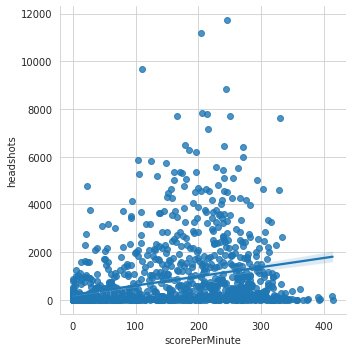

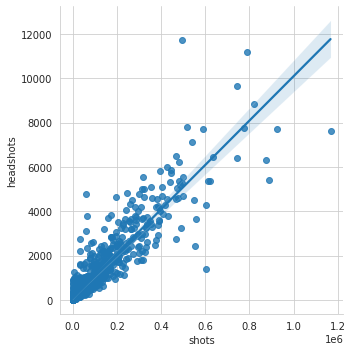

In [5]:
sns.set_style('whitegrid')
sns.lmplot(x ='level', y ='headshots', data = xtrain)
sns.lmplot(x ='hits', y ='headshots', data = xtrain)
sns.lmplot(x ='timePlayed', y ='headshots', data = xtrain)
sns.lmplot(x ='gamesPlayed', y ='headshots', data = xtrain)
sns.lmplot(x ='assists', y ='headshots', data = xtrain)
sns.lmplot(x ='scorePerMinute', y ='headshots', data = xtrain)
sns.lmplot(x ='shots', y ='headshots', data = xtrain)

### normalization

In [6]:
def normalize(n):
    n_normed = (n - n.min(0, keepdims= True)[0])/(n.max(0, keepdims= True)[0] - n.min(0, keepdims= True)[0])
    return n_normed

In [ ]:
# xtrain = normalize(xtrain)

## Split

In [7]:
from sklearn.model_selection import train_test_split
y = xtrain['headshots']
x = xtrain.drop(columns=['headshots'])

print(x.info())
#print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558 entries, 0 to 1557
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   wins            1558 non-null   int64  
 1   kdRatio         1558 non-null   float64
 2   killstreak      1558 non-null   int64  
 3   level           1558 non-null   int64  
 4   losses          1558 non-null   int64  
 5   prestige        1558 non-null   int64  
 6   hits            1558 non-null   int64  
 7   timePlayed      1558 non-null   int64  
 8   averageTime     1558 non-null   float64
 9   gamesPlayed     1558 non-null   int64  
 10  assists         1558 non-null   int64  
 11  misses          1558 non-null   int64  
 12  xp              1558 non-null   int64  
 13  scorePerMinute  1558 non-null   float64
 14  shots           1558 non-null   int64  
dtypes: float64(3), int64(12)
memory usage: 182.7 KB
None


In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

## Classifier with SKlearn

In [9]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [10]:
lr_pred = lr_model.predict(X_test)

## Custom code

In [11]:
from datetime import datetime

def regression(x_data, y, alpha):
    x, theta, hyp, hyp_diff = [], [0], [], []
    x_data_shape = x_data.shape
    for i in range(x_data_shape[1]):
        x.append(x_data.iloc[:,i].tolist())
    ###############################################################     BEFORE NORMALIZATION
    # plt.scatter(x[3], y, color='blue')
    # plt.scatter(x[2], y, color='red')
    # plt.scatter(x[4], y, color='green')
    # plt.show()
    
    y = np.asarray(y)
    x = np.asarray(x)
    # y = normalize(y)
    # x = normalize(x)

    ###############################################################     AFTER NORMALIZATION
    # plt.scatter(x[3], y, color='blue')
    # plt.scatter(x[2], y, color='red')
    # plt.scatter(x[4], y, color='green')
    # plt.show()
        #theta initialization################################################
    for i in range(x_data_shape[1]):
        theta.append(sum(x[i])/len(x[i]))
    print(f"initial thetas: {theta}")
    
    theta = np.asarray(theta)
    
    print(f"x[0]:{x.shape[0]} --- x[1]:{x.shape[1]}")
    print(f"y size:{y.shape}")
    print(x)
    prev_time = datetime.now()
    for epoch in range(10001):
        hyp = []
        for i in range(x.shape[0]): #rows
            # if i==2: ###########                 ############################    non-linear
            #     hyp = ((x[i]**2)*theta[i+1]) + theta[0]
            # if i==3:
            #     hyp = ((x[i]**3)*theta[i+1]) + theta[0]
            # if i==4:
            #     hyp = ((x[i]**4)*theta[i+1]) + theta[0]
            # else:
            hyp = (x[i]*theta[i+1]) + theta[0]
            
        hyp = np.asarray(hyp)
        '''
        
        '''
        hyp_diff = hyp - y
        
        theta [0] = theta[0] - (alpha/(2*x_data_shape[0]))* sum(hyp_diff)
        for i in range(1, theta.size):
            theta[i] = theta[i] - (alpha/(2*x_data_shape[0]))*sum(hyp_diff*x[i-1])
        
        error = hyp_diff ** 2
        
        if epoch %1000 == 0:
            print("===================================================================================================")
            print(f"error: {sum(error)}, alpha:{alpha},\ntheta at epoch {epoch}: {theta}")
            print(f"***time:{datetime.now() - prev_time}")
            prev_time = datetime.now()
            print(f"hype size:{hyp.size}")
            #alpha *= 0.95
        if sum(error) < 0.5:
            return theta
            break
        if epoch == 10000:
            return theta

thetas = regression(X_train,y_train, alpha=0.01)
print(thetas)

initial thetas: [0, 149.8804173354735, 0.6396582028335951, 6.856340288924558, 43.31139646869984, 4.902086677367576, 47.56099518459069, 9994.15569823435, 417.0465489566613, 21.681493764162862, 112.38202247191012, 656.0770465489567, 43965.630016051364, 840526.4101123596, 108.63602850608312, 53959.67014446228]
x[0]:15 --- x[1]:1246
y size:(1246,)
[[2.67000000e+02 3.49000000e+02 9.20000000e+01 ... 1.50000000e+01
  3.51900000e+03 0.00000000e+00]
 [6.55850880e-01 8.92924233e-01 6.87635575e-01 ... 1.66666667e-01
  8.77371553e-01 0.00000000e+00]
 [6.00000000e+00 1.50000000e+01 6.00000000e+00 ... 0.00000000e+00
  1.90000000e+01 0.00000000e+00]
 ...
 [2.35836600e+06 2.00820200e+06 1.40843000e+05 ... 5.64600000e+03
  9.06215700e+06 0.00000000e+00]
 [4.26709574e+00 1.10493082e+02 5.94708661e+01 ... 0.00000000e+00
  3.30616205e+02 0.00000000e+00]
 [4.12700000e+03 1.11353000e+05 3.76700000e+03 ... 0.00000000e+00
  1.16662000e+06 0.00000000e+00]]
error: 6.225459063321742e+22, alpha:0.01,
theta at epo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: overflow encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in multiply


error: nan, alpha:0.01,
theta at epoch 1000: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
***time:0:00:01.708759
hype size:1246
error: nan, alpha:0.01,
theta at epoch 2000: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
***time:0:00:01.666857
hype size:1246
error: nan, alpha:0.01,
theta at epoch 3000: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
***time:0:00:01.652248
hype size:1246
error: nan, alpha:0.01,
theta at epoch 4000: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
***time:0:00:01.613202
hype size:1246
error: nan, alpha:0.01,
theta at epoch 5000: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
***time:0:00:01.591288
hype size:1246
error: nan, alpha:0.01,
theta at epoch 6000: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
***time:0:00:01.601400
hype size:1246
error: nan, alpha:0.01,
theta at epoch 7000: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan 

In [ ]:
def mvl_regression(x_data):
    x = []
    x_data_shape = x_data.shape
    for i in range(x_data_shape[1]):
        x.append(x_data.iloc[:,i].tolist())
    

    x = np.asarray(x)
    x = normalize(x)
    
    hyp = []
    hyp = np.asarray(hyp)
    
    for i in range(x.shape[0]): #rows
        hyp = (x[i]*thetas[i+1]) + thetas[0]
    
    return hyp

y_pred = mvl_regression(X_test)

In [ ]:
print(type(y_test))
print(type(lr_pred))
print(type(y_pred))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
v = 234
y_test_normalized = normalize(np.asarray(y_test))
print(y_test_normalized[v])
print(lr_pred[v])
print(y_pred[v])

0.0007920343969223807
-34.990263093803705
nan


In [ ]:
def evaluate_sklearn(y_pred, y_test):
    y_pred = np.asarray(y_pred)
    y_test = np.asarray(y_test)
    # y_pred = normalize(y_pred)
    # y_test = normalize(y_test)
    
    print(y_pred[134])
    diff = np.absolute(y_pred -  y_test)
    
    for i in range(7, y_test.shape[0], 500):
        print(f"actual value:{y_test[i]}")
        print(f"predicted value:{y_pred[i]}")
        print("....................................")
    
    print("=====================================================")
    print(f"accuracy:{(100 - (sum(diff)/diff.shape))}%")
evaluate_sklearn(lr_pred, y_test)

-2.098233598937014
actual value:214
predicted value:243.7842394158315
....................................
accuracy:[-14.06065307]%


In [ ]:
def evaluate_sklearn(y_pred, y_test):
    #y_pred = np.asarray(y_pred)
    y_test = np.asarray(y_test)
    #y_pred = normalize(y_pred)
    #y_test = normalize(y_test)
    
    print(y_pred[134])
    diff = np.absolute(y_pred -  y_test)
    
    for i in range(7, y_test.shape[0], 500):
        print(f"actual value:{y_test[i]}")
        print(f"predicted value:{y_pred[i]}")
        print("....................................")
    
    print("=====================================================")
    print(f"accuracy:{(100 - (sum(diff)/diff.shape))}%")
evaluate_sklearn(y_pred, y_test)

nan
actual value:214
predicted value:nan
....................................
accuracy:[nan]%


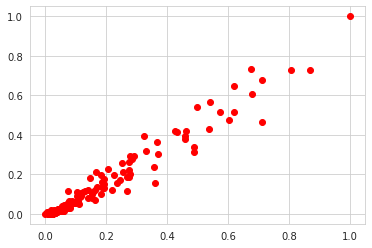

In [ ]:
# plt.scatter(y_test, y, color='blue')
y_test_normalized = normalize(np.asarray(y_test))
lr_pred_normalized = normalize(np.asarray(lr_pred))
#y_pred_normalized = normalize(np.asarray(y_pred))
plt.scatter(lr_pred_normalized, y_test_normalized, color='red')
plt.scatter(y_pred, y_test_normalized, color='green')
plt.show()